In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
data=pd.read_csv("Sentiment_Analysis_FaceBook_7k.csv")
data

,Comments Text,sentence,value
0,"So, when you ask what the two illnesses are......",Sentenceso when you ask what the two illnesses...,Positive
1,"In addition, people with BPD quite often have ...",Sentencein addition people with bpd quite ofte...,Negative
2,"Borderline Personality Disorder, like all othe...",Sentenceborderline personality disorder like a...,Negative
3,LONG ANSWER: Bipolar disease is caused by a ch...,Sentencelong answer bipolar disease is caused ...,Negative
4,Well think of bipolar as a rollar coaster you ...,Sentencewell think of bipolar as a rollar coas...,Negative
...,...,...,...
7140,Please contact SADAG (south African depression...,Sentenceplease contact sadag south african dep...,Positive
7141,It gave me severe ataxia. (ataxia = People wi...,Sentenceit gave me severe ataxia ataxia people...,Negative
7142,I have. Caused muscles to tense up swelling an...,Sentencei have caused muscles to tense up swel...,Positive
7143,Lamictal is my miracle med.Only took me 26 yea...,Sentencelamictal is my miracle med only took m...,Positive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


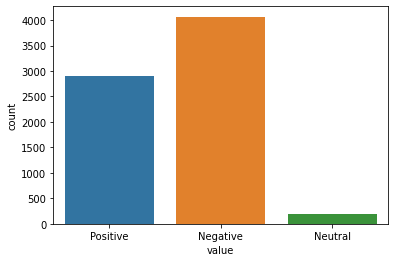

In [ ]:
sns.countplot(data.value)

In [ ]:
data.drop(columns="sentence",inplace=True)

In [ ]:
data.head()

,Comments Text,value
0,"So, when you ask what the two illnesses are......",Positive
1,"In addition, people with BPD quite often have ...",Negative
2,"Borderline Personality Disorder, like all othe...",Negative
3,LONG ANSWER: Bipolar disease is caused by a ch...,Negative
4,Well think of bipolar as a rollar coaster you ...,Negative


In [1]:
from sklearn.feature_extraction.text import CountVectorizer


In [2]:
vec=CountVectorizer()

EXAMPLE

In [3]:
Document = ["One Rat helps Two Rats",
            "To build a kindom of rats",
            "In the kindom all rats where happy"]
v=vec.fit(Document)
print(v.vocabulary_)

{'one': 7, 'rat': 8, 'helps': 3, 'two': 12, 'rats': 9, 'to': 11, 'build': 1, 'kindom': 5, 'of': 6, 'in': 4, 'the': 10, 'all': 0, 'where': 13, 'happy': 2}


In [4]:
vec.transform(Document).toarray()

array([[0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1]], dtype=int64)

ex end

In [ ]:
d_fit=vec.fit(data["Comments Text"])

In [ ]:
vocab=d_fit.vocabulary_

In [ ]:
data_array=vec.transform(data["Comments Text"]).toarray()

In [ ]:
data_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
#data["sent_array"]=data_array
#data.head()

In [ ]:
data_array.shape

(7145, 14845)

In [ ]:
data.shape

(7145, 2)

In [ ]:
data_array[0].shape

(14845,)

In [ ]:
d=pd.DataFrame(data_array)

In [ ]:
d.isnull().sum()[d.isnull().sum()>0]

Series([], dtype: int64)

In [ ]:
data.value.isnull().sum()

0

In [ ]:
data.value

0       Positive
1       Negative
2       Negative
3       Negative
4       Negative
          ...   
7140    Positive
7141    Negative
7142    Positive
7143    Positive
7144    Negative
Name: value, Length: 7145, dtype: object

In [ ]:
data.shape

(7145, 2)

In [ ]:
data_array.shape

(7145, 14845)

In [ ]:
data.tail()

,Comments Text,value
7140,Please contact SADAG (south African depression...,Positive
7141,It gave me severe ataxia. (ataxia = People wi...,Negative
7142,I have. Caused muscles to tense up swelling an...,Positive
7143,Lamictal is my miracle med.Only took me 26 yea...,Positive
7144,"I take Wellbutrin, topamax, and buspar (antide...",Negative


In [ ]:
data.value.unique()

array(['Positive', 'Negative', 'Neutral'], dtype=object)

In [ ]:
data.loc[2775][1]="Negative"

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
rf=RandomForestClassifier()

In [ ]:
x,x_test,y,y_test=train_test_split(data_array,data.value,
                                   test_size=.1,
                                   random_state=42,
                                   stratify=data.value)

In [ ]:
rf.fit(x,y)

RandomForestClassifier()

In [ ]:
result=rf.predict(x_test)

In [ ]:
result[:10]

array(['Negative', 'Positive', 'Negative', 'Negative', 'Negative',
       'Negative', 'Negative', 'Negative', 'Negative', 'Positive'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
accuracy_score(y_test,result)

0.7188811188811188

In [ ]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

    Negative       0.73      0.81      0.77       407
     Neutral       1.00      0.06      0.11        18
    Positive       0.70      0.63      0.66       290

    accuracy                           0.72       715
   macro avg       0.81      0.50      0.51       715
weighted avg       0.72      0.72      0.71       715



### RNN

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data=pd.read_csv("Sentiment_Analysis_FaceBook_7k.csv")

data.head()

,Comments Text,sentence,value
0,"So, when you ask what the two illnesses are......",Sentenceso when you ask what the two illnesses...,Positive
1,"In addition, people with BPD quite often have ...",Sentencein addition people with bpd quite ofte...,Negative
2,"Borderline Personality Disorder, like all othe...",Sentenceborderline personality disorder like a...,Negative
3,LONG ANSWER: Bipolar disease is caused by a ch...,Sentencelong answer bipolar disease is caused ...,Negative
4,Well think of bipolar as a rollar coaster you ...,Sentencewell think of bipolar as a rollar coas...,Negative


In [ ]:
s=set()
s.update("So, when you ask what the two illnesses are...they're similar in that they tend to have")
s

{' ',
 "'",
 ',',
 '.',
 'S',
 'a',
 'd',
 'e',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y'}

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

x_train,x_test,y_train,y_test=train_test_split(data["Comments Text"][:10],
                                               data.value[:10],
                                               test_size=.10,
                                               random_state=42)

In [ ]:
# TAKEN
unique_words = set()
len_max = 0

for sent in (x_train):
    unique_words.update(sent)
    if(len_max < len(sent)):
        len_max = len(sent)

# length of the list of unique_words 
print('Number of vocabs: ', len(list(unique_words)))
print('Max length of text is: ', len_max)

Number of vocabs:  66
Max length of text is:  4422


In [ ]:
vocab_size = len(list(unique_words))
embedding_dim = 300
max_length = len_max
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [ ]:
x_train[:5]

1    In addition, people with BPD quite often have ...
5    Believe me, I show you much more than anyone. ...
0    So, when you ask what the two illnesses are......
7    I was hospitalized in May for the same reason....
2    Borderline Personality Disorder, like all othe...
Name: Comments Text, dtype: object

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words = vocab_size,
                      # filters = '#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                      oov_token = oov_tok,
                      # lower = True,
                      char_level = False)
    
tokenizer.fit_on_texts(list(x_train))

# Training
x_train = tokenizer.texts_to_sequences(x_train)
x_train = pad_sequences(x_train,
                        maxlen = max_length,
                        padding = padding_type,
                        truncating = trunc_type)

'''# Validation
x_val = tokenizer.texts_to_sequences(x_val)
x_val = pad_sequences(x_val,
                      maxlen = max_length,
                      padding = padding_type,
                      truncating = trunc_type)
'''
# Testing
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test,
                       maxlen = max_length,
                       padding = padding_type,
                       truncating = trunc_type)

In [ ]:
x_train[:5]

array([[11,  1, 20, ...,  0,  0,  0],
       [ 1, 55, 19, ...,  0,  0,  0],
       [ 1,  1, 35, ...,  0,  0,  0],
       [19,  1,  1, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  0,  0,  0]], dtype=int32)

In [ ]:
x_train.shape

(9, 4422)

In [ ]:
'''
max_fatures=2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(FB_Data['Comments Text'].values)
X = tokenizer.texts_to_sequences(FB_Data['Comments Text'].values)
X = pad_sequences(X)'''

"\nmax_fatures=2000\ntokenizer = Tokenizer(num_words=max_fatures, split=' ')\ntokenizer.fit_on_texts(FB_Data['Comments Text'].values)\nX = tokenizer.texts_to_sequences(FB_Data['Comments Text'].values)\nX = pad_sequences(X)"

In [ ]:
#max_len_pad=0
#for i in x:
#  if len(i)


In [ ]:
#training
# need max len of sent,
#pad_sequences()
# valdation

In [ ]:
#x.shape

In [ ]:
#len(x[0])

In [ ]:
import numpy as np
np.unique(y_test)

array(['Positive'], dtype=object)

In [ ]:
#x.shape

In [ ]:
model=Sequential()
#model.add(layers.Embedding(x.shape[1],500,input_length=len(x[1])))
model.add(layers.Embedding(vocab_size,300,input_length = max_length))
model.add(layers.Bidirectional(layers.LSTM(256,return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(128,return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(64,return_sequences=True)))
model.add(layers.Bidirectional(layers.LSTM(32,return_sequences=False)))
#model.add(layers.Flatten())
model.add(layers.Dense(3,activation="softmax"))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4422, 300)         19800     
                                                                 
 bidirectional (Bidirectiona  (None, 4422, 512)        1140736   
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 4422, 256)        656384    
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 4422, 128)        164352    
 nal)                                                            
                                                                 
 bidirectional_3 (Bidirectio  (None, 64)               41216     
 nal)                                                   

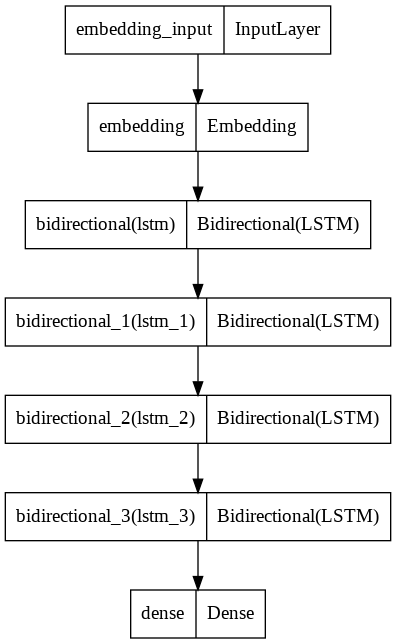

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
from keras import activations
model.compile(loss='categorical_crossentropy',#categorical_crossentropy
              optimizer="rmsprop",
              metrics=["accuracy"])

##### not required
* import tensorflow as tf
* loss1=tf.keras.losses.CategoricalCrossentropy
* opti2=tf.keras.optimizers.Adam
* opti=tf.keras.optimizers.RMSprop # default
* metri=tf.keras.metrics.Accuracy



In [ ]:
#x.shape

In [ ]:
#y.shape

In [ ]:
#y[:10]

In [ ]:
1287/100

12.87

In [ ]:
print(x_train.shape,"___",x_test.shape)

(9, 4422) ___ (1, 4422)


In [ ]:
print(y_train.shape,"___",y_test.shape)

(9,) ___ (1,)


In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
# EXAMPLE
import numpy as np
from tensorflow.keras.utils import to_categorical
### Categorical data to be converted to numeric data
colors = ["red", "green", "yellow", "red", "blue"]

### Universal list of colors
total_colors = ["red", "green", "blue", "black", "yellow"]

### map each color to an integer
mapping = {}
for x in range(len(total_colors)):
    mapping[total_colors[x]] = x
print("1st=",total_colors)

# integer representation
for x in range(len(colors)):
    colors[x] = mapping[colors[x]]
print("2nd=",colors)

one_hot_encode = to_categorical(colors)
print(one_hot_encode)

1st= ['red', 'green', 'blue', 'black', 'yellow']
2nd= [0, 1, 4, 0, 2]
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


In [ ]:
# ex ends

In [ ]:
type(y_train)

In [ ]:
# use this for array np.unique(y_train)

In [ ]:
y_train.unique()

array(['Negative', 'Positive'], dtype=object)

In [ ]:
di=dict(Positive=1, Negative=0, Neutral=2)
y_train.replace(di,inplace=True)
y_test.replace(di,inplace=True)

In [ ]:
y_train[:5]

1    0
5    1
0    1
7    0
2    0
Name: value, dtype: int64

In [ ]:
y_train = to_categorical(y_train, 3)# encode
y_test = to_categorical(y_test, 3)

In [ ]:
y_train.shape

(9, 3)

In [ ]:
y_train[:10]

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
x_train.shape

(9, 4422)

In [ ]:
#model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=2,batch_size=100)
#validation_split=0.1
model.fit(x_train,y_train,epochs=2,batch_size=100)


Epoch 1/2
1/1 [==============================] - 83s 83s/step - loss: 1.0972 - accuracy: 0.6667
Epoch 2/2
1/1 [==============================] - 70s 70s/step - loss: 0.7757 - accuracy: 0.6667
